In [39]:
#importing the required libraries

import pandas as pd

# this is used for the plot the graph 
import matplotlib.pyplot as plt 
import seaborn as sns

In [40]:
#importing dataset to train and test
data = pd.read_csv('dev.csv')

In [41]:
data

,qtext,label,atext
0,What ethnic group / race are Crip members ?,0,Prison gangs have a de facto negotiation syste...
1,What ethnic group / race are Crip members ?,0,"Nor does it count many street gangs , whose me..."
2,What ethnic group / race are Crip members ?,0,`` There was a time when most of the gang memb...
3,What ethnic group / race are Crip members ?,0,But now the street gang members who are being ...
4,What ethnic group / race are Crip members ?,0,"Crips members , who did not want to be identif..."
...,...,...,...
41180,677856,sad,felt sad to see this day end
41181,6765,sad,are you lonely and sad now?
41182,7675,sad,I think it hurts him to see you happy
41183,7665,sad,its so sad reading about it


In [42]:
#deleting the unwanted features
data = data.drop('qtext',axis=1)

In [43]:
data.head()

,label,atext
0,0,Prison gangs have a de facto negotiation syste...
1,0,"Nor does it count many street gangs , whose me..."
2,0,`` There was a time when most of the gang memb...
3,0,But now the street gang members who are being ...
4,0,"Crips members , who did not want to be identif..."


In [44]:
data.tail()

,label,atext
41180,sad,felt sad to see this day end
41181,sad,are you lonely and sad now?
41182,sad,I think it hurts him to see you happy
41183,sad,its so sad reading about it
41184,sad,I think this would be a sad memory


In [45]:
data.sample(10)

,label,atext
8692,worry,Getting a cleaning on tues then getting a toot...
23610,neutral,There's like no one I ACTUALLY know on this sh...
6429,worry,@_kotenok !! ... maybe they took one look at ...
8637,sadness,My sunglasses broke
13480,worry,Damn... Why does it take so long to install SB...
18633,worry,@TFA2431 aweee im sorry but deep down u know ...
37449,neutral,@kat15lee Yups! I still have a lot of pruning...
14848,sadness,@mitchelmusso i can't i can't i can't i'm sad...
26456,sadness,@MisfitDior good morning misfit *passes you Ty...
22922,worry,@zhayrar whoa rad ! coffee makes me stay up al...




# Data Preprocessing

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41185 entries, 0 to 41184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   41185 non-null  object
 1   atext   41185 non-null  object
dtypes: object(2)
memory usage: 643.6+ KB


In [47]:
# no missisng data

In [48]:
len(data['label'].unique())

19

In [49]:
data['label'].unique()

array(['0', '1', '2', 'sentiment', 'empty', 'sadness', 'enthusiasm',
       'neutral', 'worry', 'surprise', 'love', 'fun', 'hate', 'happiness',
       'boredom', 'relief', 'anger', 'happy', 'sad'], dtype=object)

In [50]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41185 entries, 0 to 41184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   41185 non-null  object
 1   atext   41185 non-null  object
dtypes: object(2)
memory usage: 965.3+ KB


In [51]:
data['label'] = data['label'].map({'sentiment': 3, 'empty': 5, 'sadness': 5, 
                                   'enthusiasm': 3, 'neutral': 5,
                                   'worry': 0, 'surprise': 3,
                                   'love': 6, 'fun': 3, 'hate': 4,
                                   'happiness': 3, 'relief':1,
                                   'boredom': 5,'anger': 4})

In [52]:
data.dropna(inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40017 entries, 1153 to 41179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   40017 non-null  float64
 1   atext   40017 non-null  object 
dtypes: float64(1), object(1)
memory usage: 937.9+ KB


In [54]:
# Indentify dependent variable and independent variable
X = data.atext
Y = data.label

In [55]:
X

1153                                               content
1154     @tiffanylue i know  i was listenin to bad habi...
1155     Layin n bed with a headache  ughhhh...waitin o...
1156                   Funeral ceremony...gloomy friday...
1157                  wants to hang out with friends SOON!
                               ...                        
41175    you guys are great thanks for making my day be...
41176                            I hate people coming late
41177          he looked angry and hurted at the same time
41178    I hate people interacting in middle of the con...
41179                       I hate people spreading rumors
Name: atext, Length: 40017, dtype: object

In [56]:
Y

1153     3.0
1154     5.0
1155     5.0
1156     5.0
1157     3.0
        ... 
41175    3.0
41176    4.0
41177    4.0
41178    4.0
41179    4.0
Name: label, Length: 40017, dtype: float64

In [57]:
#coverting strinbg to numerical array
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

In [58]:
X

<40017x48215 sparse matrix of type '<class 'numpy.int64'>'
	with 476027 stored elements in Compressed Sparse Row format>

In [59]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=.2,random_state=100)

In [60]:
# data preproceesing completed

In [61]:
#exploring algorithems
#KNN
from sklearn.neighbors import KNeighborsClassifier
clf_WKNN = KNeighborsClassifier(n_neighbors=13,weights='distance')

clf_WKNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [62]:
y_pred_WKNN = clf_WKNN.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_WKNN,Y_test))
score_wknn = accuracy_score(y_pred_WKNN,Y_test)*100

0.3936781609195402


# Decision Tree

In [64]:
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=11,min_samples_leaf=3)
clf_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       random_state=100)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [66]:
Y_pred_en=clf_entropy.predict(X_test)
Y_pred_en
print('Accuracy is',accuracy_score(Y_test,Y_pred_en)*100)
score_dt = accuracy_score(Y_test,Y_pred_en)*100

Accuracy is 42.65367316341829


In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred_en))

[[  32    6  138   10 1479   32]
 [   4   13   65    1  239   11]
 [  18   29  478    1 1352   84]
 [   2    0   17   38  244    4]
 [  20   10  245   19 2628   57]
 [   3    5  138    3  354  225]]


# Navie Bayes

In [68]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [69]:
BernNB = BernoulliNB(binarize=.1)
BernNB.fit(X_train,Y_train)
print(BernNB)
Y_expect = Y_test
Y_pred = BernNB.predict(X_test)
print(accuracy_score(Y_expect,Y_pred)*100)
score_nb = accuracy_score(Y_expect,Y_pred)*100

BernoulliNB(binarize=0.1)
41.454272863568214


In [70]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[ 197    0  149    0 1351    0]
 [  14    0   58    0  261    0]
 [  82    0  498    0 1378    4]
 [  21    0   14    0  270    0]
 [ 165    0  192    0 2618    4]
 [  15    0  245    0  463    5]]


In [71]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
score_lr = accuracy_score(Y_test,y_pred)*100
score_lr

44.09045477261369

In [73]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [74]:
y_pred = rf.predict(X_test)

In [75]:
score_rf = accuracy_score(Y_test,y_pred)*100
score_rf

37.21889055472264

In [76]:

scores = [score_dt,score_nb,score_lr,score_wknn,score_rf]
algorithms = ["DecisionTreeClassifier","naive_bayes","Logistic Regression","KNN","Random forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using DecisionTreeClassifier is: 42.65367316341829 %
The accuracy score achieved using naive_bayes is: 41.454272863568214 %
The accuracy score achieved using Logistic Regression is: 44.09045477261369 %
The accuracy score achieved using KNN is: 39.36781609195402 %
The accuracy score achieved using Random forest is: 37.21889055472264 %


In [77]:
data = input('Enter your Message:')
vect = cv.transform([data]).toarray()
my_prediction = logreg.predict(vect)
print('my_prediction',my_prediction[0])

Enter your Message:happy mothers day my love
my_prediction 6.0


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

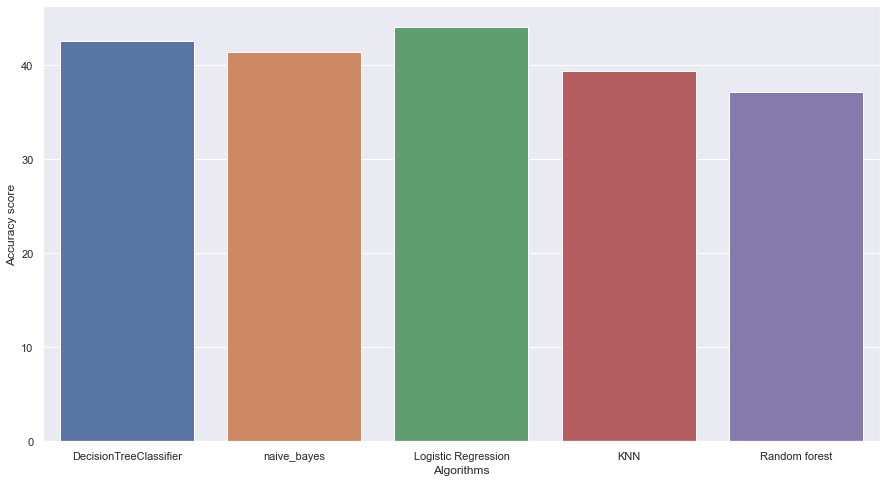

In [78]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [79]:
#!pip install tweepy

In [ ]:
import tweepy
import pandas as pd 
import csv
from tkinter import *
from tkinter import messagebox
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import ImageTk,Image
import seaborn as sns
root = Tk()
title_name = 'Psychological stress prediction'
root.title(title_name)
# bg_image = PhotoImage(file ="agri1 (2).ppm")
# x = Label (image = bg_image)
# x.grid(row = 0, column = 0)
root.geometry('1050x650')
#root.configure(background="white")

var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,bg="Steel Blue2")
var.set(title_name)
label.grid(row=0,columnspan=6,column=3)

def rule_file():
    root1=Tk()
    root1.title("login page")
    root1.geometry('600x500')
    #root1.configure(background="SkyBlue2")
    def login():
        user = E.get()
        password = E1.get()
        admin_login(user,password)
    L=Label(root1, text = "Username",bd=8,background="aliceblue",height=1,padx=16,pady=16,font=('arial',16,'bold'),width=10,).grid(row = 0,column=0)
    E=Entry(root1)
    E.grid(row = 0, column = 1)
    L1=Label(root1, text = "Password",bd=8,background="aliceblue",height=1,padx=16,pady=16,font=('arial',16,'bold'),width=10,).grid(row = 1,column=0)
    E1=Entry(root1,show="*")
    E1.grid(row = 1, column = 1)
    B1=Button(root1,text="Login",width=4,height=1,command=login,bd=8,background="lawngreen")
    B1.grid(row = 2, column = 1)
    root1.mainloop()

def admin_login(user,password):
    if user == "admin" and password == "admin":
        plot_graph()


def plot_graph():
    root10 = Tk()
    root10.title('GRAPHS')
    root10.geometry('900x800')
    #root10.configure(background="moonwhite")

    #Get your Twitter API credentials and enter them here
    consumer_key = "mDDxXp6AD7nDlW1iccfu4QCBy"
    consumer_secret = "5ejGS33wUtRej3ClYWniw9ztK7rAbsaUjO0nsMTtrNPcTZPZjK"
    access_key = "3220527972-lEs0rHzBEUPcTiNxcl4M06V1BUrkYEqyxVx87FA"
    access_secret = "VLUa4SHApjz7DYXPUgfsr75wM4wqZ8CmhcjZNoKb0rqPU"

    def get_tweets():
        #global E1
        username = E1.get()
        #http://tweepy.readthedocs.org/en/v3.1.0/getting_started.html#api
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)
        api = tweepy.API(auth)
        #set count to however many tweets you want
        number_of_tweets = 100
        #get tweets
        tweets_for_csv = []
        # Open/Create a file to append data
        csvFile = open(username[1:]+'.csv', 'a')
        #Use csv Writer
        csvWriter = csv.writer(csvFile)

        for tweet in tweepy.Cursor(api.search,q=username,count=100,lang="en",since="2017-04-03").items(number_of_tweets):
            print (tweet.created_at, tweet.text)
            csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])


    def OpenFile_train():
        global data,data1,name
        name = askopenfilename(initialdir="C:/Users/Batman/Documents/Programming/tkinter/",
                               filetypes =(("csv File", "*.csv"),("All Files","*.*")),
                               title = "Choose a file.")
        try:
            with open(name,'r') as UseFile:
                data = UseFile.readlines()
                index = data[0].index('b')
                print(data[0][index+2:])
                e3.delete(0,END)
                e3.insert(0,data[0][index+2:])
        except FileNotFoundError:
             print("No file exists") 

    def psychologicalstress_via_tweet():
        msg = E1.get()
        vect = cv.transform([msg]).toarray()
        my_prediction = logreg.predict (vect)
        print('my_prediction',my_prediction[0])
        if my_prediction[0] == 0:
            print("depressd")
            e4.delete(0,END)
            e4.insert(0,'depressd')
        else:
            print("Not depressed")
            e4.delete(0,END)
            e4.insert(0,'Not depressed')


    def detect_psychologicalstress():
        msg = e3.get()
        vect = cv.transform([msg]).toarray()
        my_prediction = logreg.predict(vect)
        print('my_prediction',my_prediction[0])

        if my_prediction[0] == 0:
            print("depressd")
            e4.delete(0,END)
            e4.insert(0,'depressd')
        elif my_prediction[0] == 2:
            print("Blocked")
            e4.delete(0,END)
            e4.insert(0,'Blocked')
        elif my_prediction[0] == 3:
            print("Happy")
            e4.delete(0,END)
            e4.insert(0,'Happy')
        elif my_prediction[0] == 4:
            print("Hate")
            e4.delete(0,END)
            e4.insert(0,'Hate') 
        elif my_prediction[0] == 5:
            print("Sad")
            e4.delete(0,END)
            e4.insert(0,'Sad')  
            
        elif my_prediction[0] == 6:
            print("Love")
            e4.delete(0,END)
            e4.insert(0,'Love')  
        else:
            print("Not depressed")
            e4.delete(0,END)
            e4.insert(0,'Not depressed')


    L  = Label(root10, text = "Enter Name",bd=8,height=1,padx=16,pady=16,font=('arial',16,'bold'),width=10,)
    L.grid(row = 1,column=0)

    E1  = Entry(root10)
    E1.grid(row=1,column=5)

    B1 = Button(root10, text = "get tweets",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="white",command = get_tweets)
    B1.grid(row=2,column=3)

    B2 = Button(root10, text = "Browse file",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="white",command = OpenFile_train)
    B2.grid(row=2,column=4)

    B3 = Button(root10, text = "Tweet Predict",height=1,padx=16,pady=16,bd=8,bg="SteelBlue1",font=('arial',16,'bold'),\
                width=10,command = psychologicalstress_via_tweet)
    B3.grid(row=2,column=5)


    L2  = Label(root10, text = "Entry Message",bd=8,height=1,padx=16,pady=16,font=('arial',16,'bold'),width=10,).grid(row = 3,column=0)

    e3 = Entry(root10)
    e3.grid(row=3,column=3)

    B2 = Button(root10, text = "Text predict",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),\
                width=10,bg="lemon chiffon",command = detect_psychologicalstress)
    B2.grid(row=4,column=3)

    e4 = Entry(root10)
    e4.grid(row=4,column=4)
    
    root10.mainloop()

# B3= Button(root, text = "Plot psychological_stress",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="white",command = plot_psychologicalstress)
# B3.grid(row=5,column=3)

B_rule = Button(root, text = "User",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),\
                width=10,command=rule_file)
B_rule.grid(row=4,column=1) 

output = Entry(root)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\urllib3\connection.py", line 169, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\ADMIN\anaconda3\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\ADMIN\anac

my_prediction 5.0
Not depressed
my_prediction 0.0
depressd
my_prediction 0.0
depressd
my_prediction 6.0
Love
my_prediction 6.0
Not depressed


In [ ]:
!pip install tweepy